In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
from mpl_toolkits.basemap import Basemap

import gsw.density as density

In [2]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

In [3]:
path_in = "./"
out_path = "./"

#file_ds = xr.open_dataset(path_in + 'global-analysis-forecast-phy-001-024-monthly_1643785075501.nc')
file_ds = xr.open_dataset(path_in + 'A_O2_cmems_monthly.nc')
#print(file_ds)
# file_ds.info
# file_ds.dims
file_ds.coords

Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 3.856 ... 628.0 697.3 773.4
  * latitude   (latitude) float32 8.0 8.25 8.5 8.75 9.0 9.25 9.5 9.75 10.0
  * time       (time) datetime64[ns] 1998-01-16T12:00:00 ... 2018-12-16T12:00:00
  * longitude  (longitude) float32 75.0 75.25 75.5 75.75 ... 76.5 76.75 77.0

In [4]:
# Set the coordinate names (used later for accessing the data)
lon_name = "longitude"
lat_name = "latitude"
time_name = "time"
depth_name = "depth"

# Set the variable names
oxy_name = "o2"


In [5]:
## Close the FIn dataset to free memory
file_ds.close()

In [6]:
# --- Choose the variable to plot (but comment the others with the symbol #): ---
var_sel = file_ds[oxy_name]

dataset_3D = False 
if depth_name in var_sel.coords:
    dataset_3D = True
    
# --- Set up the arrays of coordinates for the selected dataset ---
# 
lats = var_sel[lat_name]
lons = var_sel[lon_name]
times = var_sel[time_name]
depths = var_sel[depth_name] if dataset_3D else []

print(lons)

<xarray.DataArray 'longitude' (longitude: 9)>
array([75.  , 75.25, 75.5 , 75.75, 76.  , 76.25, 76.5 , 76.75, 77.  ],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 75.0 75.25 75.5 75.75 ... 76.5 76.75 77.0
Attributes:
    valid_min:            75.0
    valid_max:            77.0
    step:                 0.25
    units:                degrees_east
    unit_long:            Degrees East
    long_name:            Longitude
    standard_name:        longitude
    axis:                 X
    _ChunkSizes:          1440
    _CoordinateAxisType:  Lon


###### Set the variable's min and max values for the plot and the colorbar (otherwise assign None):

In [7]:
# Set lat-lon limits - FULL AREA
lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()


In [8]:
# For automatic colobar limits
min_value, max_value = None, None 

In [9]:
# Set the desired depth (in meters)
d = 0

#### Plot configuration

In [10]:
# Plot configuration
width_inch = 16
height_inch = 8

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


# Basemap configuration
basemap_config = { 
    "projection": "merc",
    #"projection": "spstere"
    "llcrnrlat": lat_min,
    "llcrnrlon": lon_min,
    "urcrnrlat": lat_max,
    "urcrnrlon": lon_max,
    "resolution": 'c',
    "epsg": 4326
}

# Axes labels
xlabel = 'longitude [deg]'
ylabel = 'latitude [deg]'
xlabelpad = 30
ylabelpad = 30

# Colorbar configuration
cmap = "viridis"
# color-blindness friendly: viridis, cividis
# NOT color-blindness friendly: plasma, inferno, magma, jet
cbar_position = "right"
#shading="flat"
shading="gouraud"
#shading="auto"
#shading="nearest"



SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

title_fontstyle = {
    "fontname":"DejaVu Serif",
    "fontsize": BIGGER_SIZE,
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 10
}

xlabel_fontstyle = {
    "fontname":"DejaVu Serif",
    "family":"DejaVu Serif",
    "fontsize": MEDIUM_SIZE,
    "fontweight": "bold",
    "labelpad": 25
}

ylabel_fontstyle = {
    "fontname":"DejaVu Serif",
    "fontsize": MEDIUM_SIZE,
    "fontweight": "bold",
    "labelpad": 35
}

ticks_fontstyle = {
    "fontname":"DejaVu Serif",
    "fontsize": SMALL_SIZE,
    #"fontstyle": "italic",
    "fontweight": "bold",
    #"pad": 30
}

cmap_fontstyle = {
    "fontname":"DejaVu Serif",
    "fontsize": SMALL_SIZE,
    #"fontstyle": "italic",
    "weight": "bold",
    "labelpad": -40
}

o2_cbar = {
    #"size": "5%",
    "pad": 0.01,
    #"pack_start": True,
    "label": "$O_2\ mmol.m^{-3}$",
    "labelpad" : 30,
    "y" : 1.05,
    "rotation": 0
}

#### Map generation

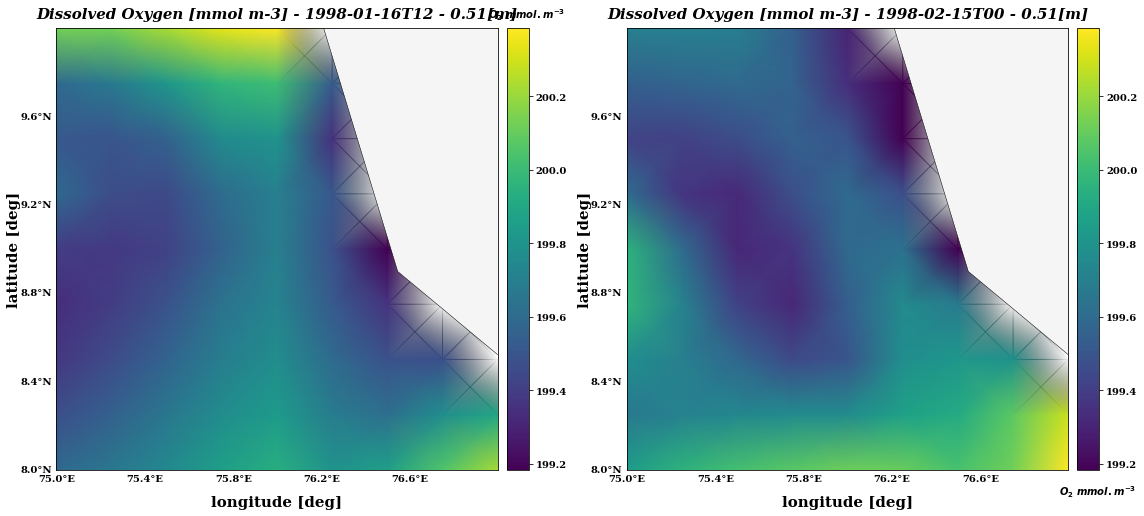

In [11]:
# Set the coordinates indexes
lat_indexes = getRangeIndexes(lats, lat_min, lat_max)
lon_indexes = getRangeIndexes(lons, lon_min, lon_max)
depth_indexes = [0]

# Get the selected coordinates:
lats_sel = lats[lat_indexes]
lons_sel = lons[lon_indexes]

fig= plt.figure(figsize=(width_inch, height_inch))
map = Basemap(**basemap_config)
    
    #######################################################################################################
    #                                        1st PLOT
    #######################################################################################################
#
# add_subplot(number of rows,number of columns, position)
#
fig.add_subplot(1, 2, 1)
time_indexes_0 = [0]

for t in time_indexes_0: 
    if dataset_3D:
        data = var_sel[t, :, lat_indexes, lon_indexes].sel(depth=d,method='nearest')
    else: 
        data = var_sel[t, lat_indexes, lon_indexes]
    
    ## contour fill
    min_value = data.min() if min_value is None else min_value
    max_value = data.max() if max_value is None else max_value
    step_value = 0.5
    contour_levels = np.arange(min_value, max_value, step_value)
        
    ## pcolormesh
    x = np.linspace(0, map.urcrnrx, data.shape[1])
    y = np.linspace(0, map.urcrnry, data.shape[0])
    xx, yy = np.meshgrid(lons_sel, lats_sel)
    
    colormesh = map.pcolormesh(xx,yy,data,vmin=min_value, vmax=max_value, cmap=cmap, shading=shading)
    
    ## draw meridians and parallels
    step_lat = float((lat_max - lat_min) / 5)
    step_lon = float((lon_max - lon_min) / 5)
    parallels = np.arange(lat_min, lat_max, step_lat)
    meridians = np.arange(lon_min, lon_max, step_lon) 
    map.drawmeridians(meridians, labels=[0,0,0,1], **ticks_fontstyle, fmt="%2.1f", linewidth=0.0)
    map.drawparallels(parallels, labels=[1,0,0,0], **ticks_fontstyle, fmt="%2.1f", linewidth=0.0)
    ## draw countries...
    map.drawcountries(linewidth=2, color='olive')
    #map.fillcontinents(color='lightgray',lake_color='aqua')
    map.drawcoastlines(linewidth=0.5, color='black')
    map.fillcontinents(color='whitesmoke',lake_color='aqua')
    
    ## draw colorbar
    clb = map.colorbar(colormesh, cbar_position)
    clb.set_label('$O_2\ mmol.m^{-3}$', y= 1.05, rotation= 0, **cmap_fontstyle)
    clb.ax.tick_params(labelsize=10)
    for l in clb.ax.yaxis.get_ticklabels():
        l.set_family("DejaVu Serif")
        l.set_weight("bold")

     # set title
    title_sel = data.long_name
    timestep = np.datetime_as_string(times[t],'h')
    var_str = "{} [{}]".format(title_sel, data.units)
    if dataset_3D:
        depth_str = "{:.2f}{}".format(float(data[depth_name]), "[m]")
        title = ' - '.join((var_str, timestep, depth_str))
    else:
        title = ' - '.join((var_str, timestep))
    
    plt.title(title, **title_fontstyle)  
    plt.xlabel(xlabel, **xlabel_fontstyle)
    plt.ylabel(ylabel, **ylabel_fontstyle)  
    
    #######################################################################################################
    #                                        2nd PLOT
    #######################################################################################################
#
# add_subplot(number of rows,number of columns, position)
#
fig.add_subplot(1, 2, 2)
time_indexes_1 = [1]

for t in time_indexes_1: 
    if dataset_3D:
        data = var_sel[t, :, lat_indexes, lon_indexes].sel(depth=d,method='nearest')
    else: 
        data = var_sel[t, lat_indexes, lon_indexes]
    
    ## contour fill
    min_value = data.min() if min_value is None else min_value
    max_value = data.max() if max_value is None else max_value
    step_value = 0.5
    contour_levels = np.arange(min_value, max_value, step_value)
        
    ## pcolormesh
    x = np.linspace(0, map.urcrnrx, data.shape[1])
    y = np.linspace(0, map.urcrnry, data.shape[0])
    xx, yy = np.meshgrid(lons_sel, lats_sel)
    
    colormesh = map.pcolormesh(xx,yy,data,vmin=min_value, vmax=max_value, cmap=cmap, shading=shading)
    
    ## draw meridians and parallels
    step_lat = float((lat_max - lat_min) / 5)
    step_lon = float((lon_max - lon_min) / 5)
    parallels = np.arange(lat_min, lat_max, step_lat)
    meridians = np.arange(lon_min, lon_max, step_lon) 
    map.drawmeridians(meridians, labels=[0,0,0,1], **ticks_fontstyle, fmt="%2.1f", linewidth=0.0)
    map.drawparallels(parallels, labels=[1,0,0,0], **ticks_fontstyle, fmt="%2.1f", linewidth=0.0)
    ## draw countries...
    map.drawcountries(linewidth=2, color='olive')
    #map.fillcontinents(color='lightgray',lake_color='aqua')
    map.drawcoastlines(linewidth=0.5, color='black')
    map.fillcontinents(color='whitesmoke',lake_color='aqua')
    
    ## draw colorbar
    clb = map.colorbar(colormesh, cbar_position)
    clb.set_label('$O_2\ mmol.m^{-3}$', y=-0.03, rotation=0, **cmap_fontstyle)
    clb.ax.tick_params(labelsize=10)
    for l in clb.ax.yaxis.get_ticklabels():
        l.set_family("DejaVu Serif")
        l.set_weight("bold")

     # set title
    title_sel = data.long_name
    timestep = np.datetime_as_string(times[t],'h')
    #t = np.datetime64("1992")
    #timestep = np.datetime_as_string(t, unit='D')
    var_str = "{} [{}]".format(title_sel, data.units)
    if dataset_3D:
        depth_str = "{:.2f}{}".format(float(data[depth_name]), "[m]")
        title = ' - '.join((var_str, timestep, depth_str))
    else:
        title = ' - '.join((var_str, timestep))
    
    plt.title(title, **title_fontstyle)  
    plt.xlabel(xlabel, **xlabel_fontstyle)
    plt.ylabel(ylabel, **ylabel_fontstyle)  
    
    
############################################
#
#    saving plot 
#
############################################
# output file
output_file = os.path.join(out_path,title.replace(' ','_')) + ".jpg"
# save the output file
plt.savefig(output_file,bbox_inches='tight',dpi=300)

plt.tight_layout() 
plt.show()
plt.close()
    

# Filled timeseries-vertical profile

('time', 'depth')


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


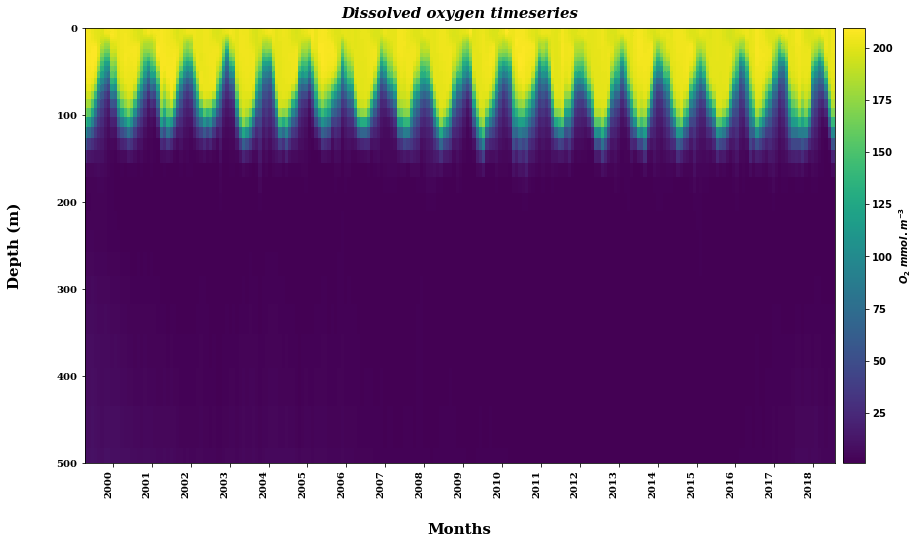

In [12]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# slice latlon ranges and averaging. Time-vs-depth plot. WHOLE TIME IN THE DATA
# oxy_boxmean_3 = var_sel.sel(longitude=slice(75.4,76.5), latitude=slice(8,9), 
#                          depth=slice(0,300)).mean(dim=['longitude','latitude'])

# slice latlon ranges and averaging. Time-vs-depth plot. WITH TIME-SLICE

fig, ax = plt.subplots(figsize=(width_inch, height_inch))

time_sub    = var_sel.sel(time=slice('2000-01-01 00:00', '2018-12-31 12:00'))
depth_sub   = var_sel.sel(depth=slice(0,800))
oxy_boxmean_3 = time_sub.sel(depth=slice(0,800),longitude=slice(75.4,76.5),
                             latitude=slice(8,9)).mean(dim=['longitude','latitude'])

print(oxy_boxmean_3.dims)

# WORKING: Quick Timeseries Profile plot of Temperature with Transpose data == T.plot()
oxy_boxmean_3.T.plot(cbar_kwargs={'pad':0.01,'label':'$O_2\ mmol.m^{-3}$'})
plt.gca().invert_yaxis()

plt.title("Dissolved oxygen timeseries", **title_fontstyle)
plt.xlabel("Months", **xlabel_fontstyle)
plt.ylabel("Depth (m)", **ylabel_fontstyle)
plt.xticks(rotation=90,size=10, **ticks_fontstyle)
plt.yticks(rotation=0,size=10, **ticks_fontstyle)

left = dt.date(2000, 1, 1)
right = dt.date(2018, 12, 31)

# Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 

# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=360)) 

# Changes x-axis range
plt.gca().set_xbound(left, right)

ax.set_ylim([500, 0])

# save the output file
# plt.savefig('timeseries_oxy_profiles.jpg',bbox_inches='tight',dpi=300)
plt.show()



# VERTICAL PROFILE PLOT

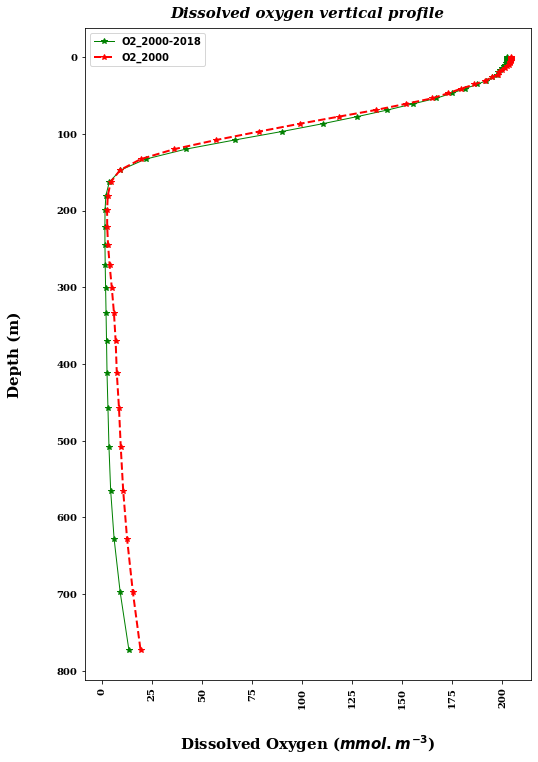

In [13]:
# slice latlon ranges and averaging. Time-vs-depth plot. WHOLE TIME IN THE DATA
# oxy_boxmean_5 = var_sel.sel(longitude=slice(75.4,76.5), latitude=slice(8,9), 
#                          depth=slice(0,300)).mean(dim=['longitude','latitude'])

# slice latlon ranges and averaging. Time-vs-depth plot. WITH TIME-SLICE

fig, ax = plt.subplots(figsize=(8, 12))

depth_sub    = var_sel.sel(depth=slice(0,800))
oxy_boxmean_5_1stline = depth_sub.sel(time=slice('2000-01-01 00:00', '2018-12-31 12:00'),longitude=slice(75.4,76.5),
                           latitude=slice(8,9)).mean(dim=['longitude','latitude','time']).values

oxy_boxmean_5_2ndline = depth_sub.sel(time=slice('2000-01-01 00:00', '2000-12-31 12:00'),longitude=slice(75.4,76.5),
                           latitude=slice(8,9)).mean(dim=['longitude','latitude','time']).values
depth = depth_sub["depth"].values

# print(depth,oxy_boxmean_5)

plt.plot(oxy_boxmean_5_1stline,depth,linewidth=1, color='green',
         linestyle='solid', marker='*', label='O2_2000-2018')
plt.plot(oxy_boxmean_5_2ndline,depth,linewidth=2, color='red',
         linestyle='dashed', marker='*', label='O2_2000')

# oxy_boxmean_3.T.plot()
plt.gca().invert_yaxis()

plt.title("Dissolved oxygen vertical profile", **title_fontstyle)
plt.xlabel("Dissolved Oxygen ($mmol.m^{-3}$)", **xlabel_fontstyle)
plt.ylabel("Depth (m)", **ylabel_fontstyle)
plt.xticks(rotation=90,size=10, **ticks_fontstyle)
plt.yticks(rotation=0,size=10, **ticks_fontstyle)
plt.legend(loc=2)


############################################
#
#    saving plot 
#
############################################
# plt.savefig('timeseries_oxy_profiles.jpg',bbox_inches='tight',dpi=300)
plt.show()


# TIMESERIES PLOTS

# Single line-single yaxis timeseries

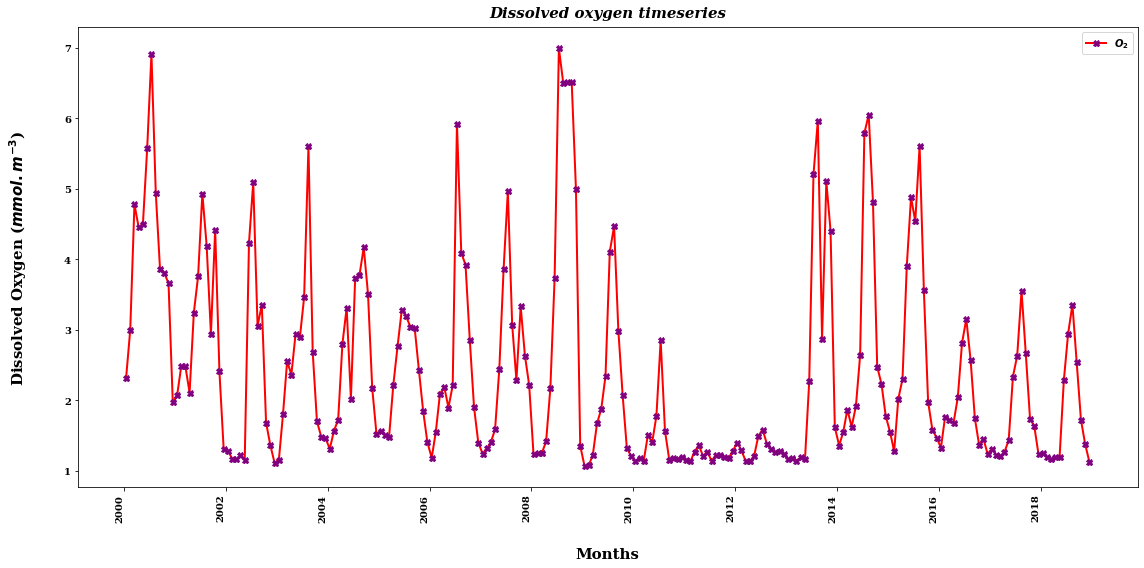

In [28]:

# slice a single-TIME 
# tmp    = var_sel.sel(time=slice('2017-01-01 00:00', '2017-02-01 12:00'))
# oxy_boxmean_4 = tmp.sel(longitude=slice(75.4,76.5), latitude=slice(8,9),
#                        depth=slice(0,300)).mean(dim=['longitude','latitude'])

# slice a single-LOCATION 
tmp    = var_sel.sel(time=slice('2000-01-01 00:00', '2018-12-31 12:00'))
oxy_boxmean_4 = tmp.sel(longitude=slice(75.4), latitude=slice(8.8),
                      depth=slice(200,800,800)).mean(dim=['longitude','latitude'])


# oxy_boxmean_4.plot()
# print(oxy_boxmean_4)

fig, ax = plt.subplots(figsize=(width_inch, height_inch))
oxy_boxmean_4.plot.line(hue='depth',
                      marker="X",
                      ax=ax,
                      color="red",
                      linewidth=2,
                      markerfacecolor="purple",
                      markeredgecolor="purple")
plt.title("Dissolved oxygen timeseries", **title_fontstyle)
plt.xlabel("Months", **xlabel_fontstyle)
plt.ylabel("Dissolved Oxygen ($mmol.m^{-3}$)", **ylabel_fontstyle)
plt.xticks(rotation=90,size=10, **ticks_fontstyle)
plt.yticks(rotation=0,size=10, **ticks_fontstyle)
plt.legend(['$O_{2}$'])

#ax.set_xlim('2000-01-01 00:00', '2018-12-31 12:00')

############################################
#
#    saving plot 
#
############################################
# output file
output_file = os.path.join(out_path,"timeseries.jpg")
# save the output file
plt.savefig(output_file,bbox_inches='tight',dpi=300)

plt.tight_layout() 
plt.show()
plt.close()

# Multi-line single yaxis timeseries

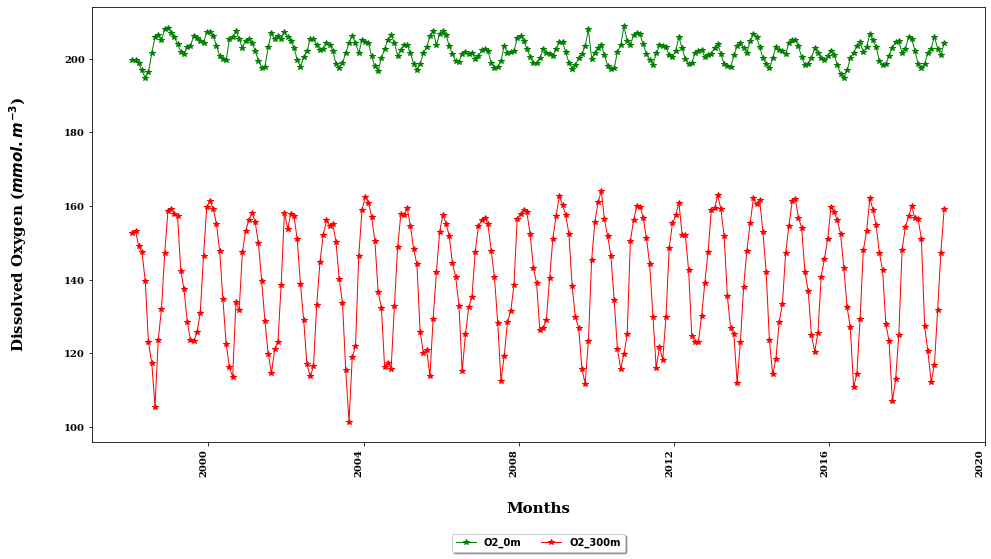

In [15]:
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# slice latlon and depth ranges and averaging --- BOX-AVERAGE
oxy_boxmean_1_1stline = var_sel.sel(longitude=slice(75.4,76.5), latitude=slice(8,9), 
                          depth=slice(0,1,1)).mean(dim=['longitude','latitude','depth'])
oxy_boxmean_1_2ndline = var_sel.sel(longitude=slice(75.4,76.5), latitude=slice(8,9), 
                          depth=slice(0,300,1)).mean(dim=['longitude','latitude','depth'])

oxy_boxmean_1_1stline.plot(linewidth=1, color='green', linestyle='solid', marker='*', label='O2_0m')
oxy_boxmean_1_2ndline.plot(linewidth=1, color='red', linestyle='solid', marker='*', label='O2_300m')


# print(oxy_boxmean)

# plt.title("Dissolved oxygen timeseries", **title_fontstyle)
plt.xlabel("Months", **xlabel_fontstyle)
plt.ylabel("Dissolved Oxygen ($mmol.m^{-3}$)", **ylabel_fontstyle)
plt.xticks(rotation=90,size=10, **ticks_fontstyle)
plt.yticks(rotation=0,size=10, **ticks_fontstyle)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# save the output file
# plt.savefig('timeseries_oxy_profiles.jpg',bbox_inches='tight',dpi=90)
plt.show()

# Multi yaxis timeseries TRY

AttributeError: 'Line2D' object has no property 'secondary_y'

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


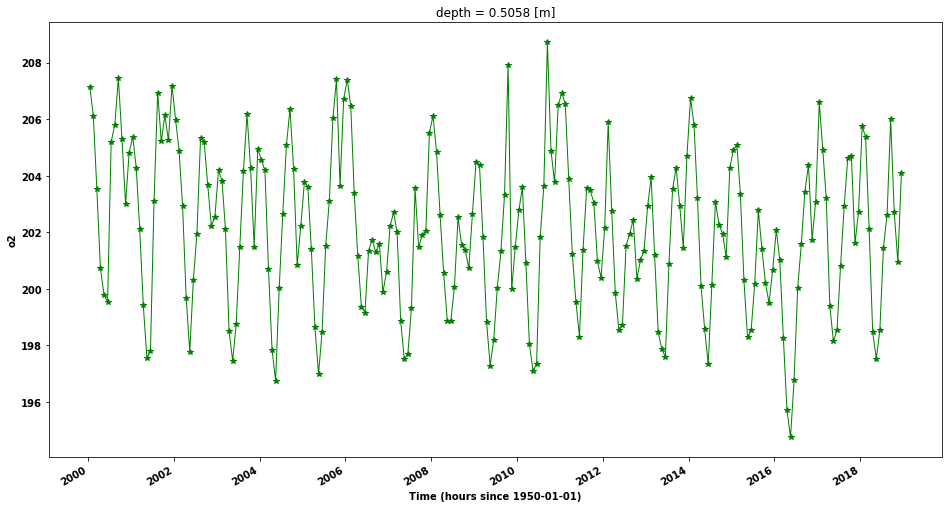

In [16]:

# slice latlon ranges and averaging (SURFACE/ DESIRED DEPTH) --- BOX-AVERAGE
# inorder to plot a specfic depth, 
# change 1st parameter out-of-3 of depth slice, 2nd denote maximum depth, 3rd is increment 

time_subset    = var_sel.sel(time=slice('2000-01-01 00:00', '2020-12-31 12:00'))
oxy_boxmean_2_1stline = time_subset.sel(longitude=slice(75.4,76.5), latitude=slice(8,9),
                      depth=slice(0,1,800)).mean(dim=['longitude','latitude'])

time_subset_2    = var_sel.sel(time=slice('2000-01-01 00:00', '2018-12-31 12:00'))
oxy_boxmean_2_2ndline = time_subset_2.sel(longitude=slice(75.4,76.5), latitude=slice(8,9),
                      depth=slice(0,300,800)).mean(dim=['longitude','latitude'])

time_subs_1 = time_subset["time"].values
time_subs_2 = time_subset_2["time"].values


fig, ax1 = plt.subplots(figsize=(width_inch, height_inch))
# oxy_boxmean_2.plot(hue='depth',
#                       marker="^",
#                       ax=ax,
#                       color="red",
#                       linewidth=2,
#                       markerfacecolor="purple",
#                       markeredgecolor="purple")

oxy_boxmean_2_1stline.plot(linewidth=1, color='green', linestyle='solid', marker='*', label='O2_0m')
oxy_boxmean_2_2ndline.plot(secondary_y=True, style='g', linewidth=1, color='red', linestyle='solid', marker='*', label='O2_300m')


# ax1.plot(oxy_boxmean_2_1stline, 'g-', linewidth=1, color='green', linestyle='solid', marker='*', label='O2_800m')
# ax2.plot(oxy_boxmean_2_2ndline, 'b-', linewidth=1, color='red', linestyle='dashed', marker='*', label='O2_300m')

# ax1.set_xlabel("Months")
# ax1.set_ylabel("Dissolved Oxygen ($mmol.m^{-3}$)", color='g')
# ax2.set_ylabel("Dissolved Oxygen ($mmol.m^{-3}$)", color='b')


# plt.title("Dissolved oxygen timeseries", **title_fontstyle)
# plt.xlabel("Months", **xlabel_fontstyle)
# plt.ylabel("Dissolved Oxygen ($mmol.m^{-3}$)", **ylabel_fontstyle)
plt.xticks(rotation=90,size=10, **ticks_fontstyle)
plt.yticks(rotation=0,size=10, **ticks_fontstyle)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
#           fancybox=True, shadow=True, ncol=5)

# save the output file
# plt.savefig('timeseries_oxy_profiles.jpg',bbox_inches='tight',dpi=90)
plt.show()


# END OF CODE